# Making the Mass to Light Band Plot

This notebook takes data from Bahcall and Kulier (2014) and overlays the expected Mass to Light contribution from only galaxies

In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

h = 0.7

*loading in the data from the paper, which was extracted using WebPlotDigitizer (https://automeris.io/WebPlotDigitizer/?fbclid=IwAR2pHKJpdhxDXiaDGcFxkhW4xtBQfmw8YNnGOMAdjTTAYNlAbQh6ZH-Naz8)*

In [2]:
# low cluster richness
red = pd.read_csv(r'~/Desktop/Intra-Cluster-Light/Data/RED.csv', 
                  header = None, 
                  names = ['r / r_200', 'm / l_i(r)'])

red['m / l_i(r)'] = red['m / l_i(r)'].apply(lambda x: x*h) # changing everything to  h= 0.7

 
colorR = ['$6 \leq N \leq 8$']*len(red)

red['Bahcall and Kulier, 2014'] = colorR
errR = np.zeros(len(red))
red['error'] = errR

# medium cluster richness
green = pd.read_csv(r'~/Desktop/Intra-Cluster-Light/Data/GREEN.csv', 
                  header = None, 
                  names = ['r / r_200', 'm / l_i(r)'])

green['m / l_i(r)'] = green['m / l_i(r)'].apply(lambda x: x*h) # changing everything to  h= 0.7

colorG = ['$9 \leq N \leq 25$']*len(green)
green['Bahcall and Kulier, 2014'] = colorG
errG = [0, 0,0, 0, 0, 1.02E2*0.7,0, 0, 0, 0,0,0, 0]
green['error'] = errG

# high cluster richness
blue = pd.read_csv(r'~/Desktop/Intra-Cluster-Light/Data/BLUE.csv', 
                  header = None, 
                  names = ['r / r_200', 'm / l_i(r)'])

blue['m / l_i(r)'] = blue['m / l_i(r)'].apply(lambda x: x*h) # changing everything to  h= 0.7

colorB = ['$26 \leq N \leq 220$']*len(blue)
blue['Bahcall and Kulier, 2014'] = colorB
errB = np.zeros(len(blue))
blue['error'] = errB

In [3]:
#combining the datasets
all_colors = pd.concat([red, green,blue], ignore_index=True)
#all_colors

# Now for the fun part. Below, we actually create the plot

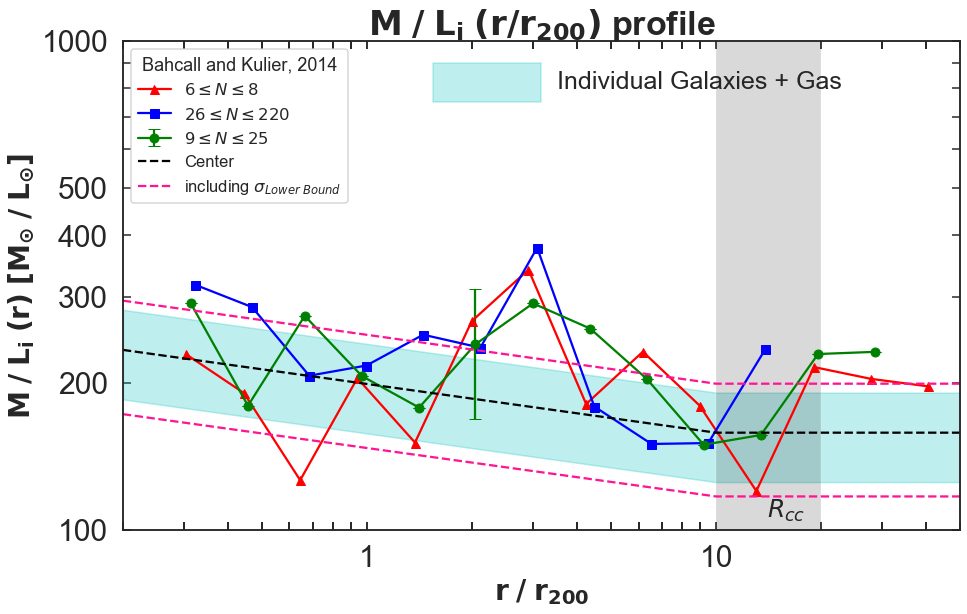

In [9]:
import matplotlib.ticker as ticker

#sns.set_context('paper',rc = {'lines.linewidth' : })
sns.set_context('talk')
sns.set_style('ticks',{"xtick.major.size":8,"ytick.major.size":8})

fig,ax = plt.subplots(figsize = (15,9))

#plotting the sets of data. wanted the error bar just on green, otherwise the caps would show up on the lines
plt.plot(red["r / r_200"],red["m / l_i(r)"],'r-',label = "$6 \leq N \leq 8$",marker = '^')

plt.errorbar(green["r / r_200"],green["m / l_i(r)"],yerr = green.error,fmt = 'g-',\
             label = "$9 \leq N \leq 25$",capsize = 6, marker = 'o')

plt.plot(blue["r / r_200"],blue["m / l_i(r)"],'b-',label = "$26 \leq N \leq 220$",marker = 's')


#scale of plot and axis limits
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.2,50)
ax.set_ylim(100,1000)

#x tick labels
x_ticks = [0.1*x for x in range(2,10)] + [x for x in range(1,10)] + [x for x in range(10,50,10)]
x_labels = [str(x) if (x == 1 or x == 10) else '' for x in x_ticks ]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)

#y tick labels. Something weird was going on but the list is a work around
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText = False))
ax.ticklabel_format(axis = 'y',style = 'plain')
ylabels = ['','', '','','','','','','200','300', '400','500']
ax.set_yticklabels(ylabels,  minor = True)

#putting ticks on top and right
ax.tick_params(axis='both', which = 'both', length = 8, labelsize = 30, bottom = True, top = True, 
               left = True, right = True, direction = 'in', pad = 15)

# plots vertical bar for Rcc
plt.axvspan(10, 20,0, 1, facecolor='k', alpha = 0.15)
plt.text(14, 106, '$R_{cc}$', fontsize = 25)

# rectangle to show what the band is showing, text to label it
plt.axhspan(ymin = 750, ymax = 900, xmin = 0.370, xmax = 0.500, color = 'c',alpha = 0.25)
plt.text(3.5, 800, 'Individual Galaxies + Gas',fontsize = 25)



#plotting the band. This uses a center value with a faint end slope of -1.3, and integrates from 0.0001 (10^-4)
CENTER_VAL_SR = 233.4
CENTER_VAL_LSS = 158.1
total_uncert_SR = 0.2078
total_uncert_LSS =0.2076

total_uncert_with_bound_SR = 0.2609
total_uncert_with_bound_LSS = 0.2593

mvsL_center_list = [CENTER_VAL_SR] + [CENTER_VAL_LSS]*2
uncert_list = [total_uncert_SR] + [total_uncert_LSS]*2

mvsL_center_array = np.array(mvsL_center_list)

#print(mvsL_center_array)
uncert_array = np.array(uncert_list)
bound_uncert_array = np.array([total_uncert_with_bound_SR] + [total_uncert_with_bound_LSS]*2)

x_band = [0.2,10,50]

y_band_1 = mvsL_center_array*(1+uncert_array)
y_band_2 = mvsL_center_array*(1-uncert_array)

#plot the band
plt.fill_between(x_band,y1 = y_band_1,y2 = y_band_2,color = 'c',alpha = 0.25)

#plotting a range to include uncertainty in lower bound
plt.errorbar(x_band,mvsL_center_array,color = 'k',linestyle = 'dashed',label = 'Center') #center values

y_band_1_with_bound = mvsL_center_array*(1+bound_uncert_array)
y_band_2_with_bound = mvsL_center_array*(1-bound_uncert_array)

plt.errorbar(x_band,y_band_1_with_bound,color = 'deeppink',linestyle = 'dashed',\
             label = r'including $\sigma_{Lower \; Bound}$')
plt.errorbar(x_band,y_band_2_with_bound,color = 'deeppink',linestyle = 'dashed')

plt.title(r"$\mathbf{M}$ $\mathbf{/}$ $\mathbf{L_{i}}$ $\mathbf{(r / r_{200})}$ profile", fontweight='bold',fontsize = 34)
plt.xlabel(r"$\mathbf{r}$ $\mathbf{/}$ $\mathbf{r_{200}}$", fontsize = 28)
plt.ylabel(
r"$\mathbf{M}$ $\mathbf{/}$ $\mathbf{L_{i}}$ $\mathbf{(r)}$ $\mathbf{[M_{\odot}}$ $\mathbf{/}$ $\mathbf{L_{\odot}]}$",fontsize = 28)

plt.legend(loc = 'upper left', title = 'Bahcall and Kulier, 2014')

plt.savefig('./Figures/Band_plot_new.png')
plt.show()